In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 및 전처리

In [2]:
data_21 = pd.read_csv('sampled_data/card_base_2021.csv')
data_22 = pd.read_csv('sampled_data/card_base_2022.csv')
data_23 = pd.read_csv('sampled_data/card_base_2023.csv')

In [3]:
data_21.head(2)

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,고객등급,자택_시도,자택_시군구
0,202101,9226657847,1급 호텔,경상북도,경산시,5번이하,10000,50대,남,일반등급,경상북도,경산시
1,202101,7249026833,1급 호텔,경상북도,경산시,5번이하,10000,40대,남,일반등급,대구광역시,수성구


## 한글 시각화용 코드

In [4]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 이전 시각화 적용

## MZ 조회 및 연령대 시각화
- MZ는 10대, 20대, 30대를 포함한다.
- '문제 선정' 파트에 사용 가능할 것 같다
- MZ 확보가 절실함

In [5]:
tmp_21 = data_21[data_21['연령대'].isin(['20대','30대'])]
tmp_22 = data_22[data_22['연령대'].isin(['20대','30대'])]
tmp_23 = data_23[data_23['연령대'].isin(['20대','30대'])]

print(f'{tmp_21['연령대'].value_counts()} \n ----------- \n {tmp_22['연령대'].value_counts()} \n ------------ \n {tmp_23['연령대'].value_counts()}')

연령대
20대    254149
30대    208819
Name: count, dtype: int64 
 ----------- 
 연령대
20대    238160
30대    205273
Name: count, dtype: int64 
 ------------ 
 연령대
20대    211650
30대    203679
Name: count, dtype: int64


## 파이차트 자동화 함수 제작

In [6]:
def make_pie_chart(df_list,colname = '연령대'):

    fig, ax = plt.subplots(1,len(df_list),figsize = (15,5))

    for i, df in enumerate(df_list):
        age_counts = df[colname].value_counts().head(10)
        labels = age_counts.index.tolist()
        sizes = age_counts.values

        ax[i].pie(sizes,
           labels = labels,
           #explode=explode,
           autopct = '%1.1f%%',
           shadow = True, startangle= 90)
        ax[i].set_title(f"{2021 + i} {colname} 파이차트")

    plt.show()

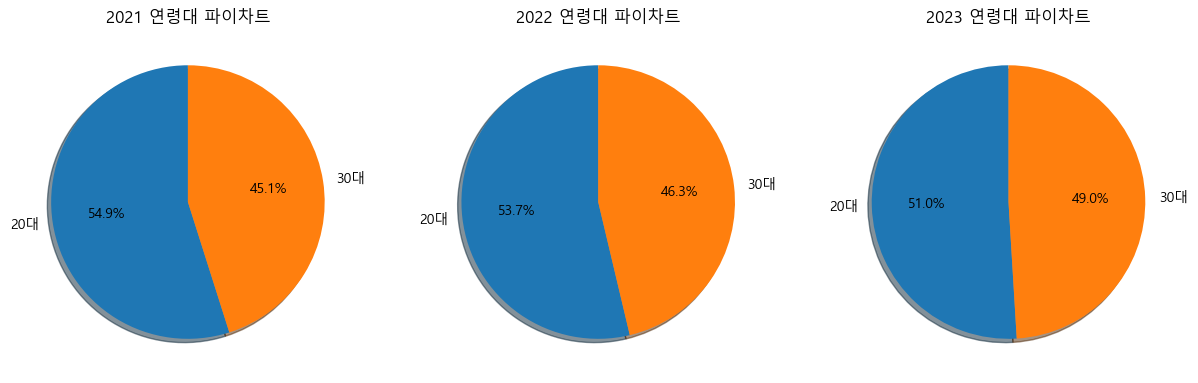

In [7]:
make_pie_chart([tmp_21,tmp_22,tmp_23])

- 30대 사용자가 점점 많아지고 있다 -> 20대 사용자가 나이가 많아 30대가 되거나, 20대가 이탈하고 있다는 증거가 된다.

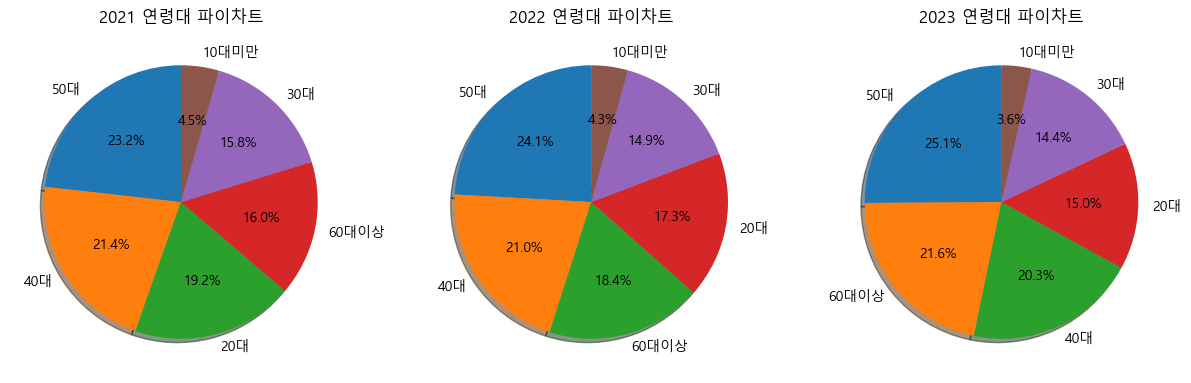

In [8]:
make_pie_chart([data_21,data_22,data_23])

- 연령대는 모수와 비슷한 경향을 띈다

# 2030 고객의 결재 가맹점 분포

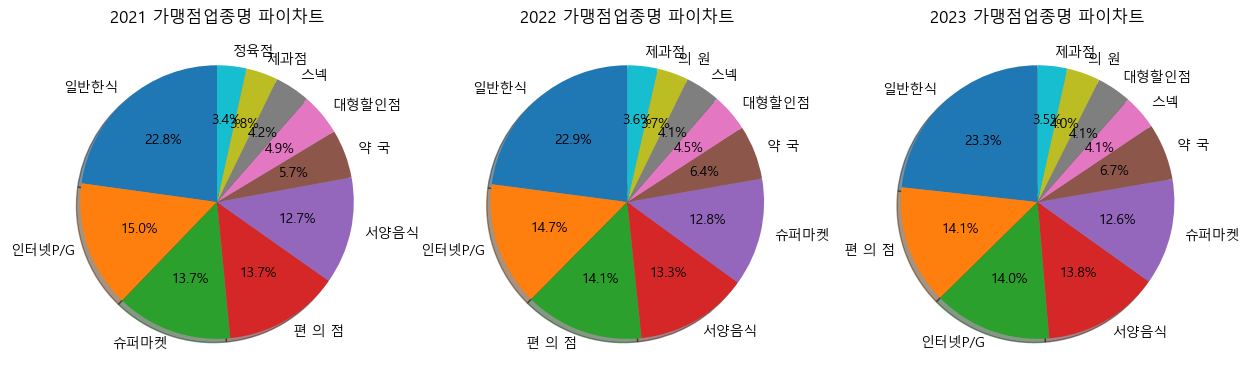

In [9]:
make_pie_chart([data_21,data_22,data_23], '가맹점업종명')

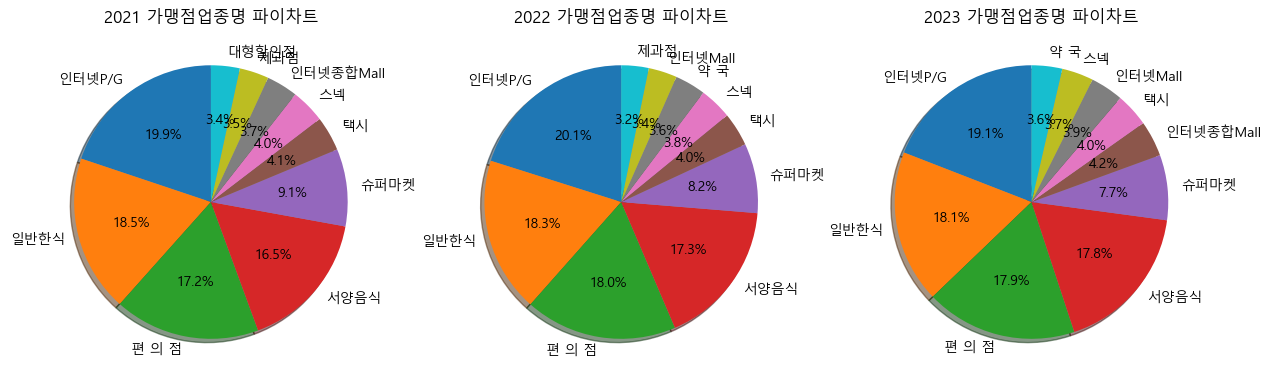

In [10]:
make_pie_chart([tmp_21, tmp_22, tmp_23], '가맹점업종명')

- 전체에 비해 2030은 인터넷 P/G및 서양음식, 편의점의 비중이 큰 것을 확인할 수 있다.
- 이 쪽 관련 혜택을 추가하면 좋을 지도

# 가맹점 지역별 위치 분포

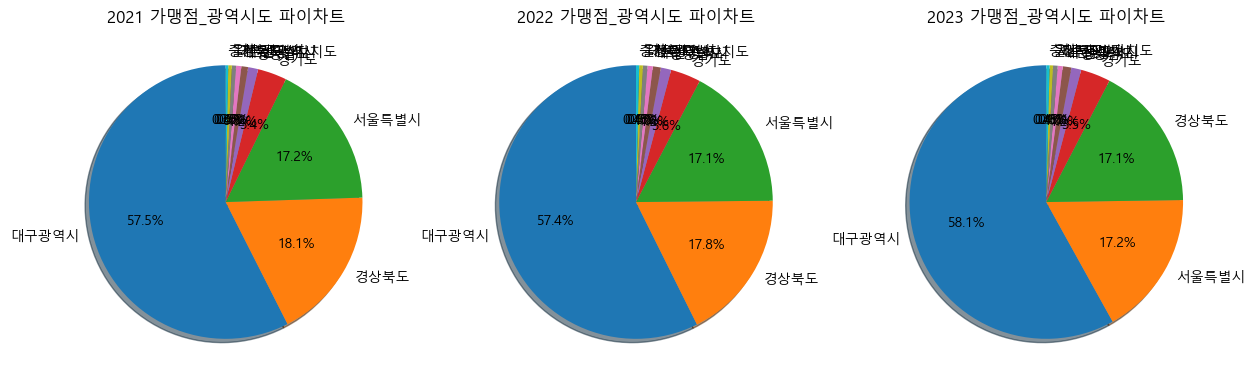

In [11]:
make_pie_chart([data_21,data_22,data_23], '가맹점_광역시도')

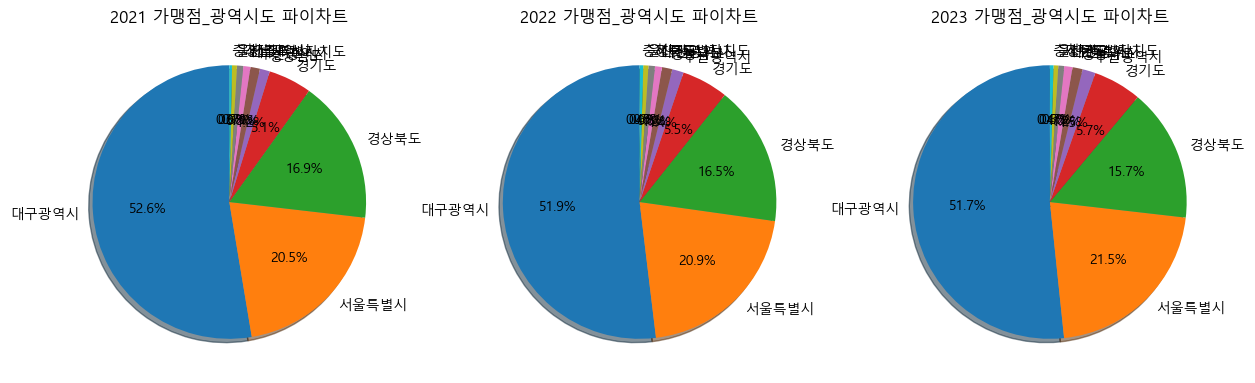

In [12]:
make_pie_chart([tmp_21,tmp_22,tmp_23], '가맹점_광역시도')

- 2030의 늘어난 서울 가맹점 결재 비중이 눈에 띈다.

# 자택 시도 분포

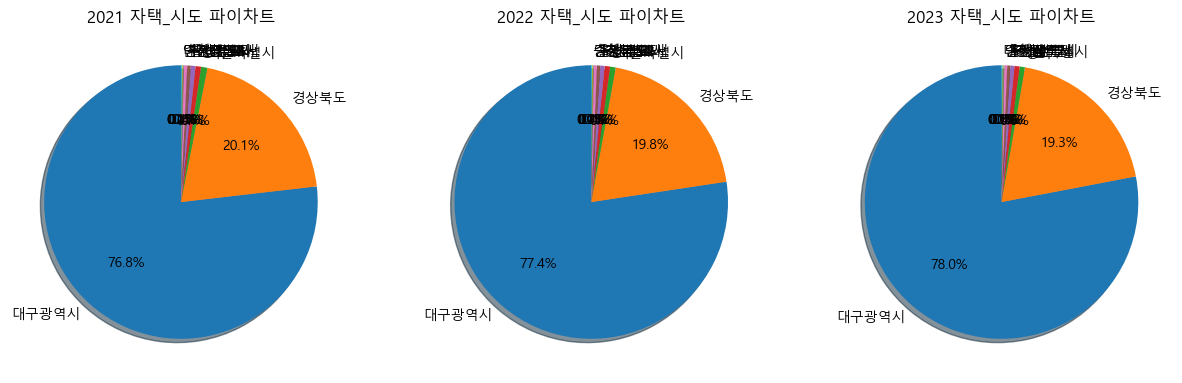

In [13]:
make_pie_chart([data_21,data_22,data_23], '자택_시도')

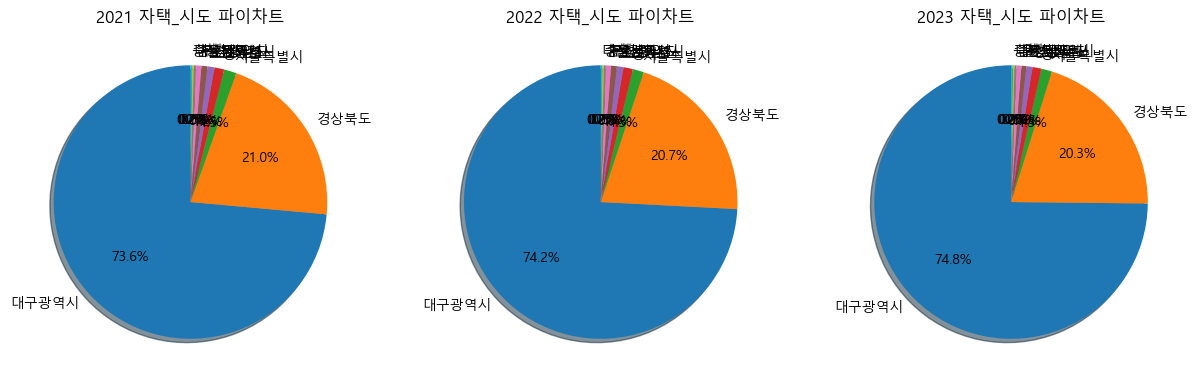

In [14]:
make_pie_chart([tmp_21,tmp_22,tmp_23], '자택_시도')

- 대구 경북의 자택 비율이 압도적으로 높지만 막상 가맹점 시도는 서울 역시 높다. 
- 이는 대구경북 출신 인물들이 학업적 목적이든 일적 목적이든 여행이든 서울로 간 이후에도 바로 이탈을 하는 것이 아니라 대구은행 카드를 꾸준히 써 주고 있음을 의미한다.
- 대구 출신 사람들의 iM뱅크 충성도가 높음을 확인할 수 있음.

# 고객 등급 분포

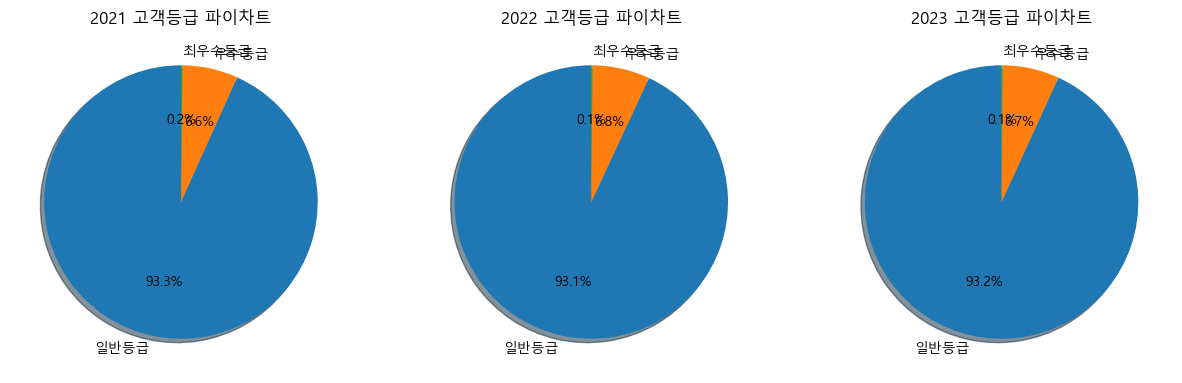

In [15]:
make_pie_chart([data_21,data_22,data_23], '고객등급')

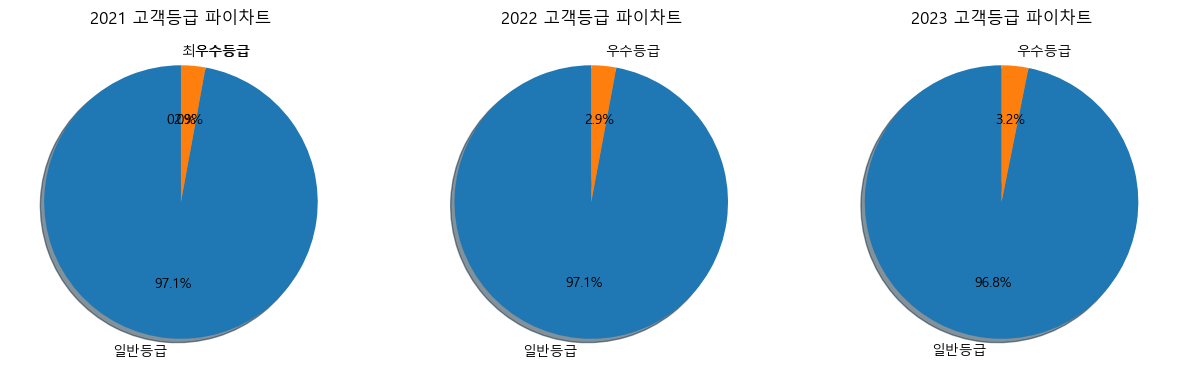

In [16]:
make_pie_chart([tmp_21,tmp_22,tmp_23], '고객등급')

- 전체적으로 일반 등급이 훨씬 많다.
- 2030대는 일반 등급이 압도적이다.
- 따라서 2030 대상으로 높은 전월 실적과 연회비를 요구하는 프리미엄 고급화 전략을 내세우기보다는 누구에게나 적용 가능한 대중적인 카드를 만드는 것이 좋아보인다.

# 승인 건수 시각화

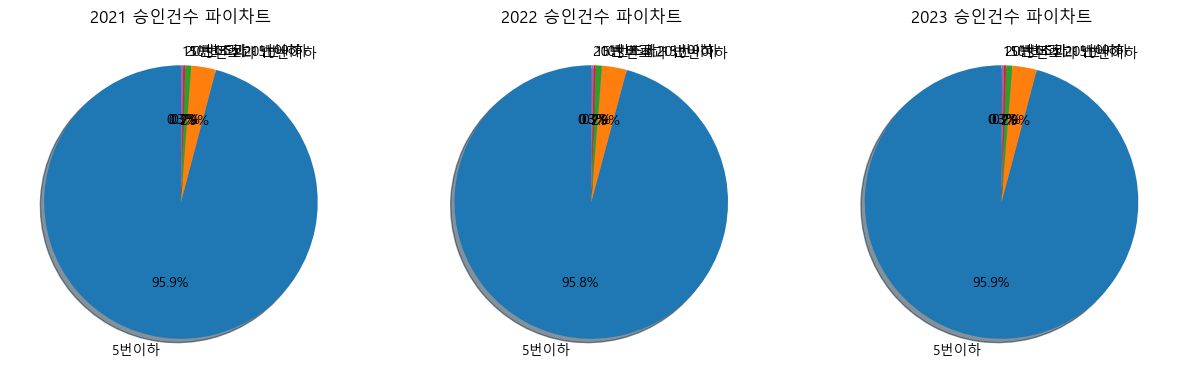

In [17]:
make_pie_chart([data_21, data_22, data_23], '승인건수')

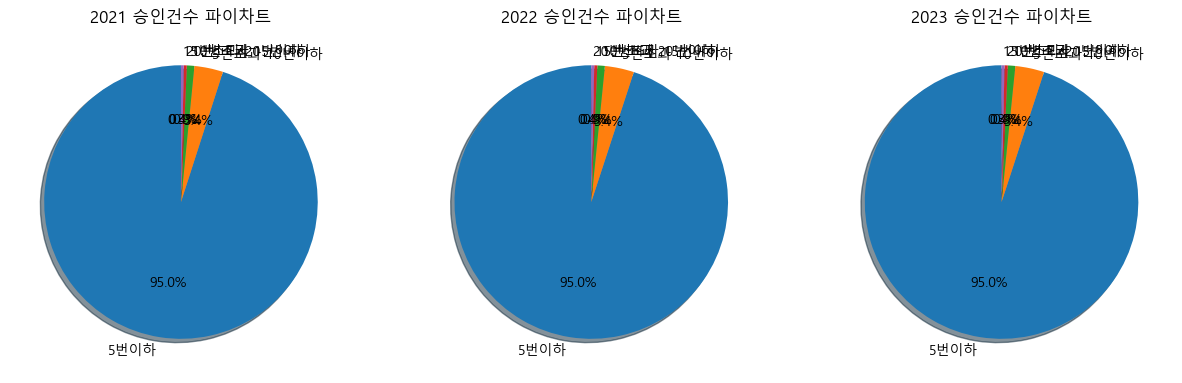

In [18]:
make_pie_chart([tmp_21,tmp_22,tmp_23], '승인건수')

- 승인건수는 압도적으로 5번 이하가 많다.

# 버터플라이 차트

In [19]:
# 소비 횟수 시각화용 데이터 생성

count_data_2030_21 = tmp_21.groupby(['가맹점업종명']).size().reset_index(name='count').sort_values(by = 'count', ascending=False).head(10)
count_data_4050_21 = data_21[data_21['연령대'].isin(['40대', '50대'])].groupby(['가맹점업종명']).size().reset_index(name='count').sort_values(by = 'count', ascending=False).head(10)

count_data_2030_22 = tmp_22.groupby(['가맹점업종명']).size().reset_index(name='count').sort_values(by = 'count', ascending=False).head(10)
count_data_4050_22 = data_22[data_22['연령대'].isin(['40대', '50대'])].groupby(['가맹점업종명']).size().reset_index(name='count').sort_values(by = 'count', ascending=False).head(10)

count_data_2030_23 = tmp_23.groupby(['가맹점업종명']).size().reset_index(name='count').sort_values(by = 'count', ascending=False).head(10)
count_data_4050_23 = data_23[data_23['연령대'].isin(['40대', '50대'])].groupby(['가맹점업종명']).size().reset_index(name='count').sort_values(by = 'count', ascending=False).head(10)

In [20]:
# Butterfly Plot 그리기 함수

def set_butterfly_foodcount(df1, df2, year = 2020):

    # Butterfly Chart

    plt.figure(figsize = (10,6))

    # 데이터 그리기
    sns.barplot(data = df1, y = '가맹점업종명', x = 'count' , color = 'BLue', label = '2030', errorbar=None)
    sns.barplot(data = df2, y = '가맹점업종명', x = 'count' , color = 'Red', label = '4050', errorbar=None ,estimator = lambda x: -sum(x))

    # 축과 레이블 설정
    plt.axvline(0, color = 'grey', linestyle = '--')
    plt.axis('tight')
    plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)

    plt.gca().spines['top'].set_visible(False)   
    plt.gca().spines['right'].set_visible(False) 
    plt.gca().spines['left'].set_visible(False)    
    plt.gca().spines['bottom'].set_visible(False)   

    plt.title(f"{year}년 세대별 식습관 소비 횟수 비교", fontsize=17)
    plt.show()

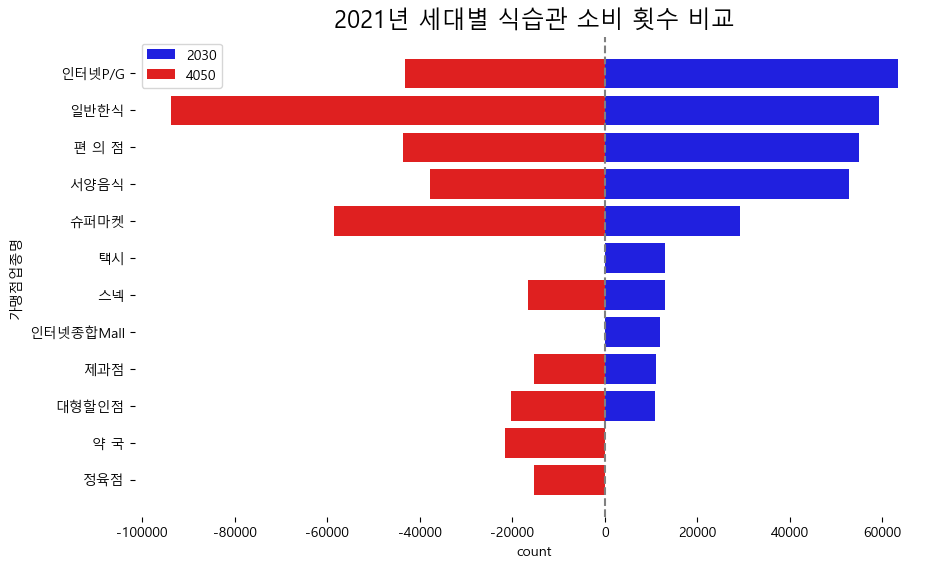

In [21]:
set_butterfly_foodcount(count_data_2030_21,count_data_4050_21, 2021)

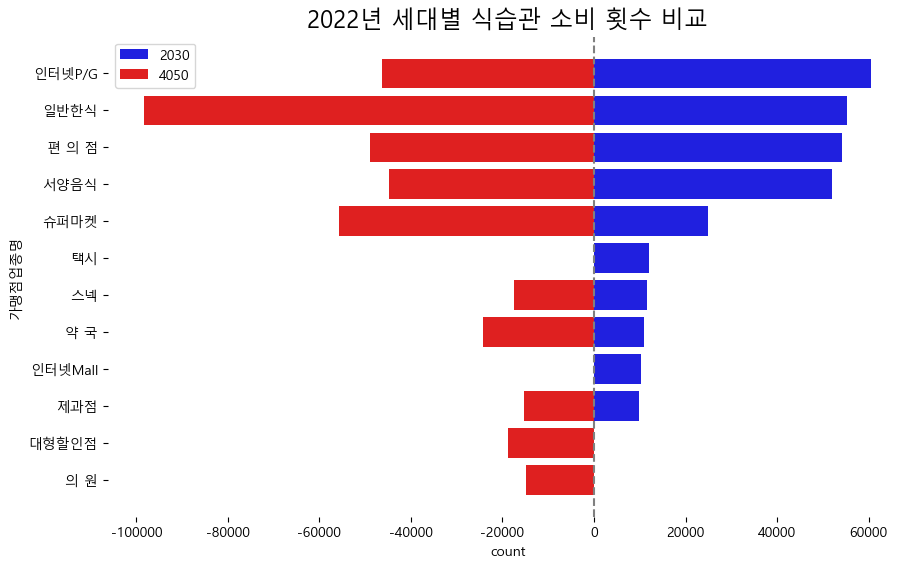

In [24]:
set_butterfly_foodcount(count_data_2030_22,count_data_4050_22, 2022)

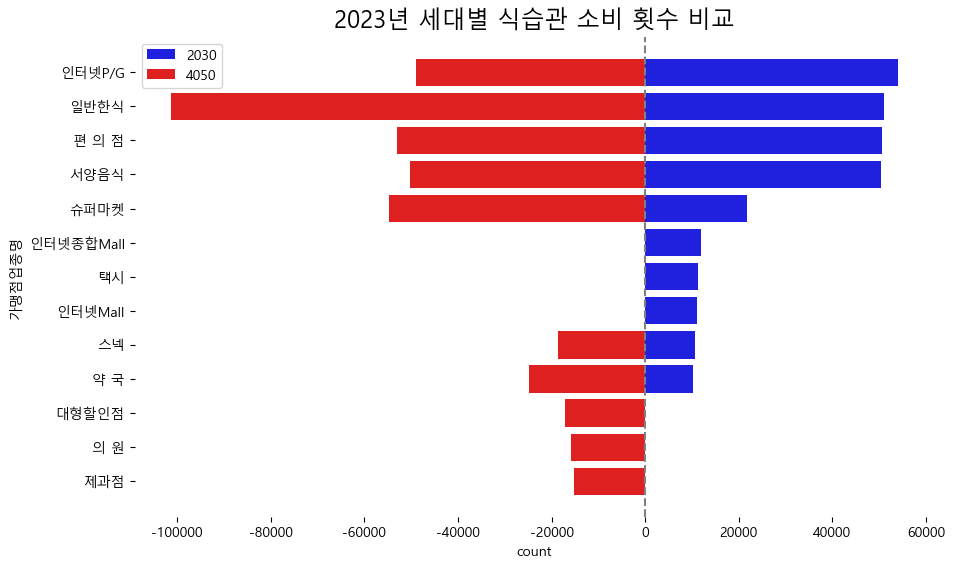

In [23]:
set_butterfly_foodcount(count_data_2030_23,count_data_4050_23, 2023)

# 데이터 분석용 process
- 분기 칼럼 추가
- 승인 건수 정수화
- 거래년월 Datetime화
